Erst werden alle dependencies geladen:

In [3]:
from ipyfilechooser import FileChooser
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, interactive, HBox, VBox
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from df_columns import df_cols


In [13]:

# user kann path eingeben
path = widgets.Text(description = 'path to datefolder', layout=widgets.Layout(width='600px'))
# globale variable, wo der path gespeichert wird
selected_path = ""


read_files = widgets.Button(description = 'read csv files')
output_path = widgets.Output()
output_read_files = widgets.Output()
select_file = widgets.Dropdown()

# Callback für Textfeld
def print_path(change):
    global selected_path  
    selected_path = change['new']
    with output_path:
        output_path.clear_output()
        print(f'Selected path: {selected_path}')

# Callback für Button
def read_csv_files(change):
    global select_file
    with output_read_files:
        output_read_files.clear_output()
        if os.path.isdir(selected_path):
            files = glob.glob(os.path.join(selected_path, '*.csv'))
            if files:
                print(f"{len(files)} CSV-Dateien gefunden:")
                print(f"This is the first file:\n{files[0]}")
                files.sort()
                select_file.options = files
            else:
                print("Keine CSV-Dateien gefunden.")
        else:
            print("Ungültiger Pfad:", selected_path)


path.observe(print_path, names='value')
read_files.on_click(read_csv_files)

display(path, output_path, read_files, output_read_files, select_file)



Text(value='', description='path to datefolder', layout=Layout(width='600px'))

Output()

Button(description='read csv files', style=ButtonStyle())

Output()

Dropdown(options=(), value=None)

In [19]:
df = pd.read_csv(select_file.value, names=df_cols)
print(f'You chose {select_file.value}')
data = df.copy()
data = data.iloc[3:]
data = data.astype(float)

keypoints = widgets.Dropdown(options = ['nose', 'spine1', 'spine2', 'centroid', 'spine3', 'spine4', 'tail1'])
display(keypoints)



You chose Z:\n2023_odor_related_behavior\2023_behavior_setup_seminatural_odor_presentation\analyse\mouse_17\2025_04_16\top1\2025_04_16_13_27_30_mouse_17_habituation_top1_40439818DLC_resnet50_mice_incubationMar12shuffle1_300000.csv


Dropdown(options=('nose', 'spine1', 'spine2', 'centroid', 'spine3', 'spine4', 'tail1'), value='nose')

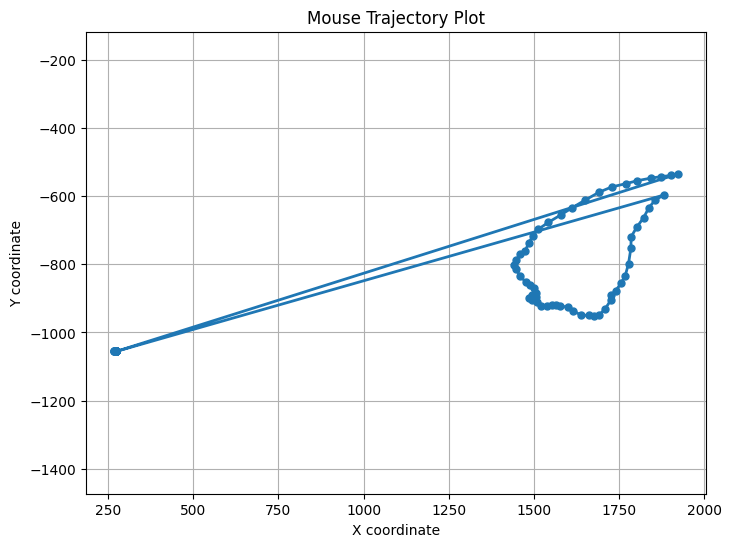

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: x and y coordinates over time
# Replace these with your actual data
x_coords = data[keypoints.value+'_x']
y_coords = data[keypoints.value+'_y']*-1

# Plot the trajectory
plt.figure(figsize=(8, 6))
plt.plot(x_coords, y_coords, marker='o', linestyle='-', linewidth=2, markersize=5)
plt.xlim((600.0, 2000.0))
plt.ylim((300.0, 1200.0 ))
plt.title("Mouse Trajectory Plot")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.grid(True)
plt.axis('equal')  # Optional: makes the aspect ratio 1:1
plt.show()

In [10]:
# First cell
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

C:\Users\quicken\AppData\Local\Temp\ipykernel_15412\3587855675.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  point.set_data(x_coords[frame], y_coords[frame])
C:\Users\quicken\AppData\Local\Temp\ipykernel_15412\3587855675.py:27: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x_coords[frame], y_coords[frame])


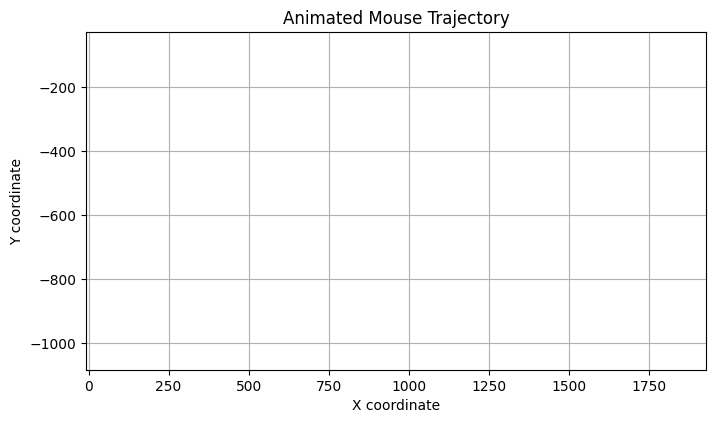

In [18]:

# Example data – replace with your real coordinates
x_coords = data[keypoints.value+'_x']
y_coords = data[keypoints.value+'_y']*-1

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
line, = ax.plot([], [], 'bo-', lw=2)
point, = ax.plot([], [], 'ro', markersize=8)

ax.set_xlim(min(x_coords) - 10, max(x_coords) + 10)
ax.set_ylim(min(y_coords) - 10, max(y_coords) + 10)
ax.set_title("Animated Mouse Trajectory")
ax.set_xlabel("X coordinate")
ax.set_ylabel("Y coordinate")
ax.grid(True)
ax.set_aspect('equal')

# Initialization function
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

# Animation update function
def update(frame):
    line.set_data(x_coords[:frame+1], y_coords[:frame+1])
    point.set_data(x_coords[frame], y_coords[frame])
    return line, point

# Create animation
ani = animation.FuncAnimation(
    fig, update, frames=len(x_coords),
    init_func=init, interval=33, repeat=False
)
ani.save("mouse_trajectory.mp4", writer="ffmpeg", fps=30)
# Display animation inline
#HTML(ani.to_jshtml())